In [1]:
import tensorflow as tf 
from model import train
import utils
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
cropping_size = 128
img_dir = 'pixiv'
batch_size = 64
learning_rate = 1e-4
layers = 5
epochs = 10
filters = 40
save_path = None

In [3]:
# load data and crop
gt = utils.crop_images(img_dir, cropping_size)
noise = utils.add_poisson_noise_to_images(gt)

# scale to [-0.5, 0.5]
gt_scaled = gt / 255.0 - 0.5
noise_scaled = noise / 255.0 - 0.5

In [4]:
bn_losses, bn_avg_psnr_list = train(gt_scaled,
                                    noise_scaled,
                                    batch_size,
                                    learning_rate,
                                    layers,
                                    epochs,
                                    filters,
                                    save_path,
                                    batch_norm=True)

losses, avg_psnr_list = train(gt_scaled,
                              noise_scaled,
                              batch_size,
                              learning_rate,
                              layers,
                              epochs,
                              filters,
                              save_path)

#0 epoch, current loss: 4301513.0, average psnr: 7.749783274904945
#1 epoch, current loss: 2798407.0, average psnr: 7.894754147984393
#2 epoch, current loss: 1987177.25, average psnr: 7.898622744319603
#3 epoch, current loss: 1526129.75, average psnr: 7.872096928647634
#4 epoch, current loss: 1241091.75, average psnr: 7.886805400477982
#5 epoch, current loss: 1044733.8125, average psnr: 7.95017459898426
#6 epoch, current loss: 903252.375, average psnr: 8.013511565391724
#7 epoch, current loss: 799124.5, average psnr: 8.070474335780391
#8 epoch, current loss: 718099.5625, average psnr: 8.115157070653407
#9 epoch, current loss: 651953.9375, average psnr: 8.150227351878437
#0 epoch, current loss: 265300.875, average psnr: 8.732093300080333
#1 epoch, current loss: 170701.3125, average psnr: 11.360358965697053
#2 epoch, current loss: 151565.15625, average psnr: 12.824694322348444
#3 epoch, current loss: 138054.53125, average psnr: 12.889583958780726
#4 epoch, current loss: 130284.9140625, a

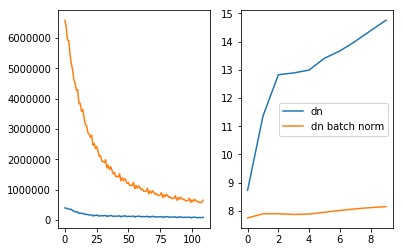

In [5]:
# plot
_, ax = plt.subplots(ncols=2)
ax[0].plot(losses, label='dn')
ax[0].plot(bn_losses, label='dn batch norm')
ax[1].plot(avg_psnr_list, label='dn')
ax[1].plot(bn_avg_psnr_list, label='dn batch norm')
plt.legend()
plt.show()